# **Importing libraries**

In [9]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Import dataset**

In [1]:


url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df.to_csv('titanic.csv', index=False)


display dataset

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Missing Values**

In [3]:
# Checkinmg missing values
print("Missing values:\n", df.isnull().sum())

# Fill missing 'Age' with mediannn
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' with modeee
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Replace missing 'Cabin' with 'Unknown'
df['Cabin'].fillna('Unknown', inplace=True)


Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<ipython-input-3-3a6e69c9c36a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-3-3a6e69c9c36a>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

# **Duplicate Rows**

In [4]:

df.drop_duplicates(inplace=True)


# **IQR**

In [5]:



def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Apply to Age and Fare
df = remove_outliers(df, 'Age')
df = remove_outliers(df, 'Fare')


# **EDA**

# **Count Plot**

<ipython-input-6-8de5284e56ed>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


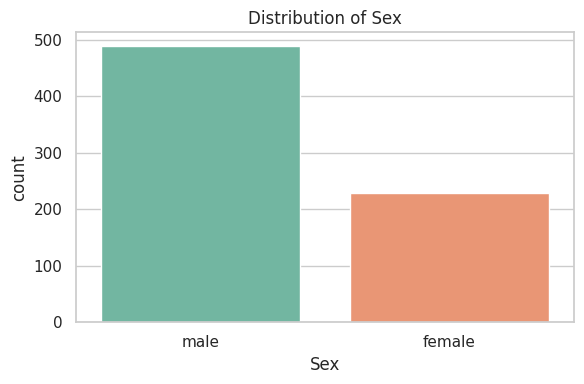

<ipython-input-6-8de5284e56ed>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


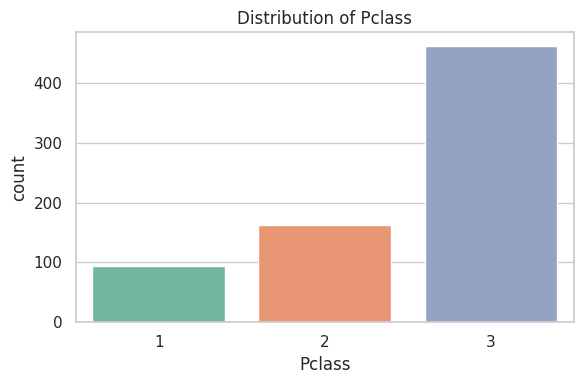

<ipython-input-6-8de5284e56ed>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


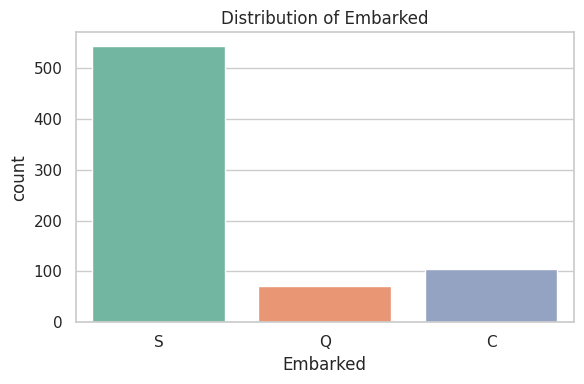

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
categorical_cols = ['Sex', 'Pclass', 'Embarked']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


# **Histo plot**

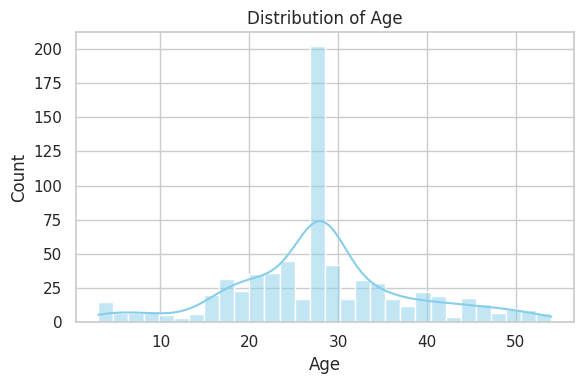

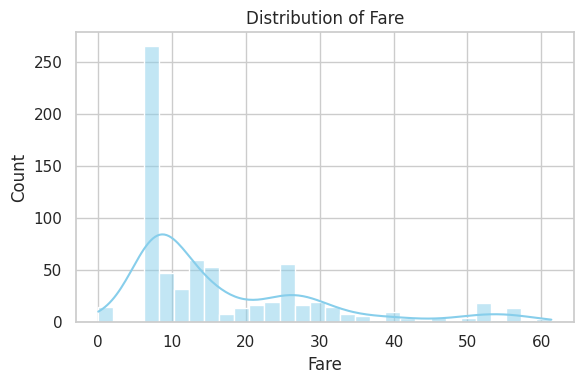

In [7]:
numeric_cols = ['Age', 'Fare']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


# **Heat Map**

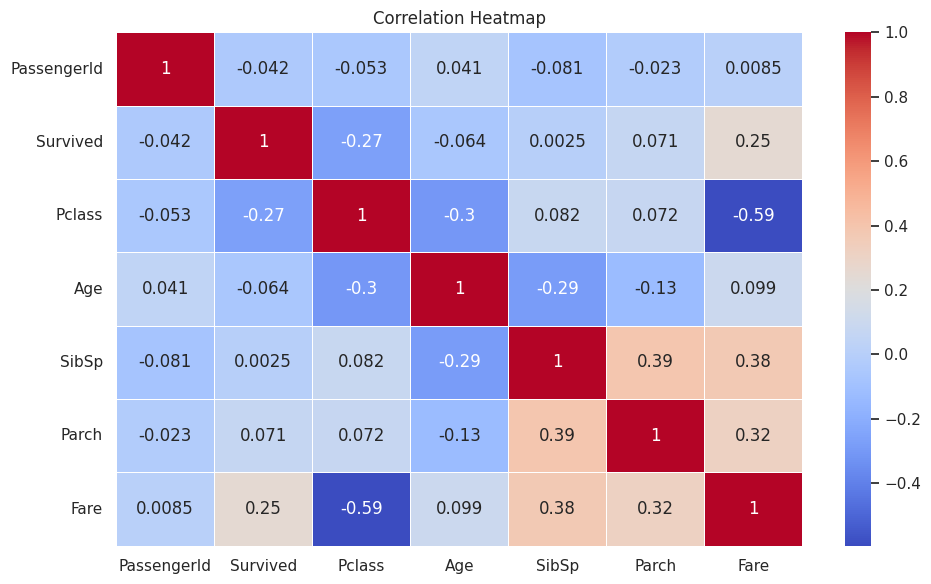

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


# **Survival Count by Gender**



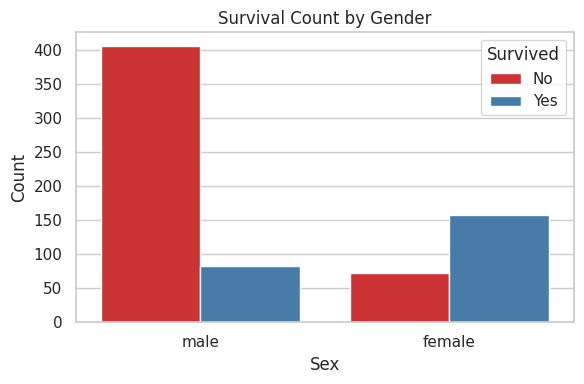

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set1')
plt.title('Survival Count by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


## **Survival Rate by Passenger Class**

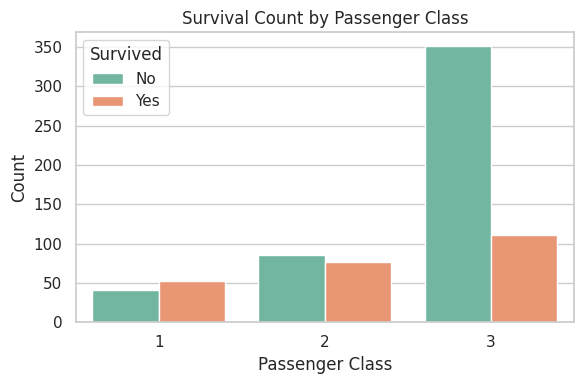

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set2')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


# **Age Distribution by Survival Status**

<ipython-input-13-78f568019bca>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Survived'] == 0], x='Age', label='Did Not Survive', shade=True)
<ipython-input-13-78f568019bca>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Survived'] == 1], x='Age', label='Survived', shade=True)


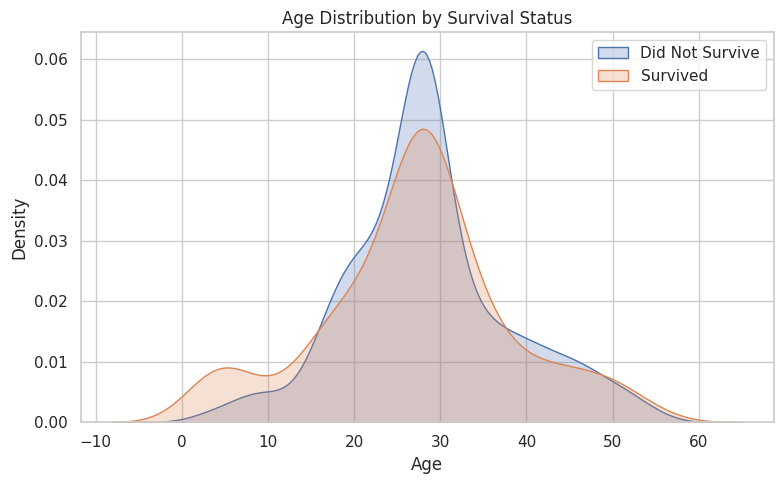

In [13]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df[df['Survived'] == 0], x='Age', label='Did Not Survive', shade=True)
sns.kdeplot(data=df[df['Survived'] == 1], x='Age', label='Survived', shade=True)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.legend()
plt.tight_layout()
plt.show()


# **Fare Distribution by Class**

<ipython-input-14-a623262c6f61>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=df, palette='pastel')


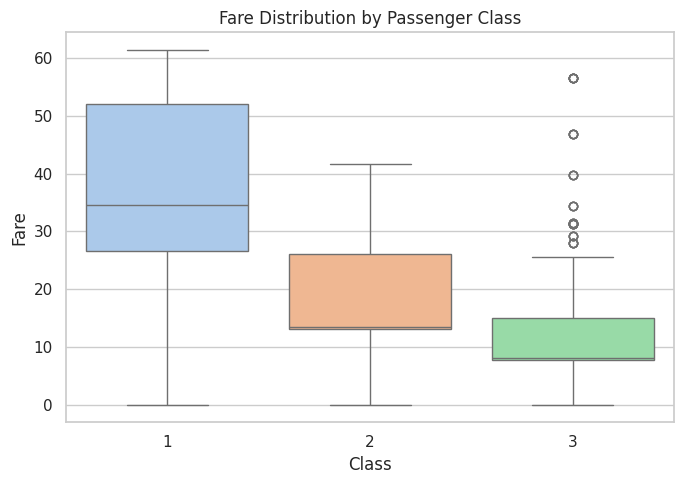

In [14]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='pastel')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Class')
plt.ylabel('Fare')
plt.tight_layout()
plt.show()


# **Survival by Embarkation Port and Class**

<Figure size 800x500 with 0 Axes>

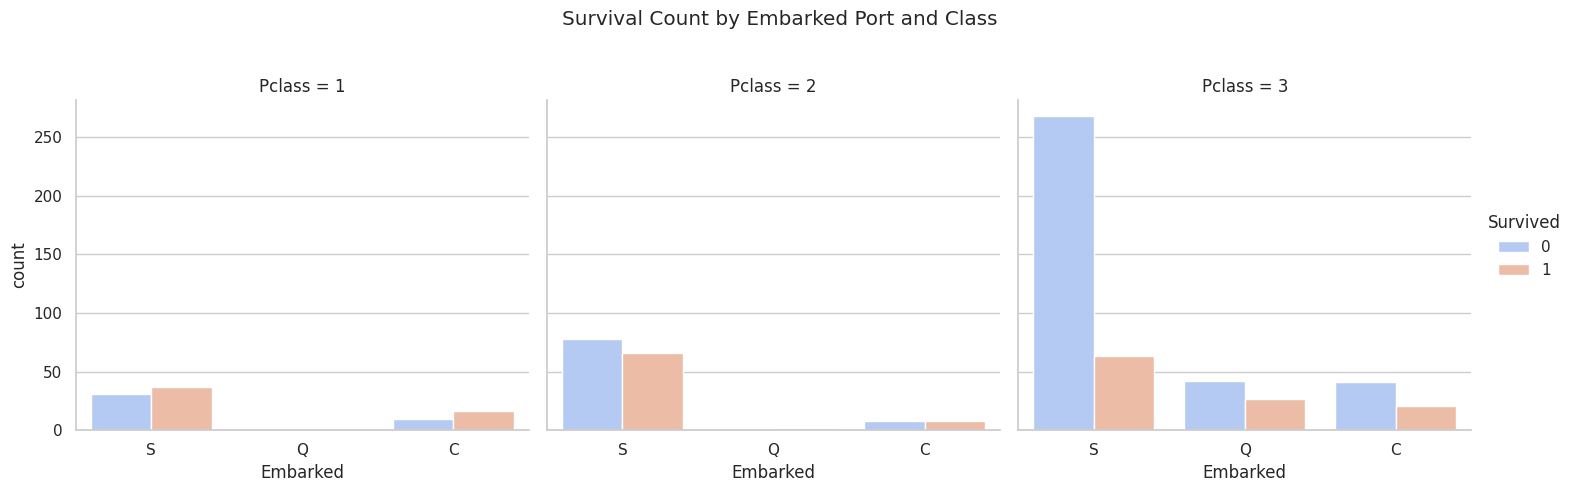

In [16]:
plt.figure(figsize=(8, 5))
sns.catplot(x='Embarked', hue='Survived', col='Pclass', data=df, kind='count', palette='coolwarm')
plt.subplots_adjust(top=0.8)
plt.suptitle('Survival Count by Embarked Port and Class')
plt.show()


# **Correlation of All Numeric Features with Survival**

<ipython-input-17-17e93137ed88>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.values, y=correlation.index, palette='Blues_r')


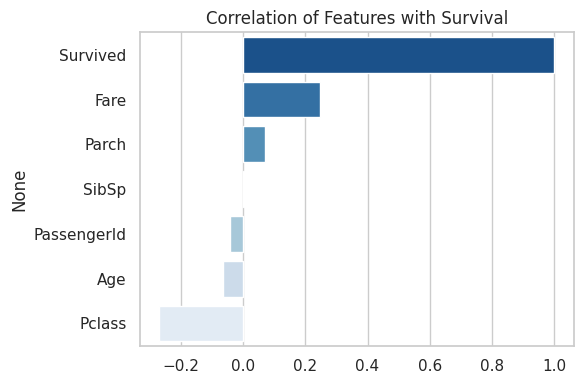

In [17]:
correlation = df.corr(numeric_only=True)['Survived'].sort_values(ascending=False)
plt.figure(figsize=(6, 4))
sns.barplot(x=correlation.values, y=correlation.index, palette='Blues_r')
plt.title('Correlation of Features with Survival')
plt.tight_layout()
plt.show()


# **Summary of Insights**

In [10]:
print("\n--- EDA Insights ---")
print("1. Most passengers are in 3rd class and male.")
print("2. Many passengers embarked from port 'S' (Southampton).")
print("3. 'Age' and 'Fare' had outliers, filtered using IQR.")
print("4. 'Cabin' has many missing values and was filled with 'Unknown'.")
print("5. Strong negative correlation between 'Pclass' and 'Fare'.")
print("6. Survival rate seems higher for females and 1st class passengers.")



--- EDA Insights ---
1. Most passengers are in 3rd class and male.
2. Many passengers embarked from port 'S' (Southampton).
3. 'Age' and 'Fare' had outliers, filtered using IQR.
4. 'Cabin' has many missing values and was filled with 'Unknown'.
5. Strong negative correlation between 'Pclass' and 'Fare'.
6. Survival rate seems higher for females and 1st class passengers.
